In [6]:
import pandas as pd
import numpy as np

# Part 1

In [5]:
expression_data = pd.read_csv('ERP009868.tsv', sep='\t')
metadata = pd.read_csv('metadata_ERP009868.tsv', sep='\t')

print(expression_data.head())
print(metadata.head())


                 Gene   ERR1046065   ERR1046066   ERR1046067   ERR1046068  \
0  ENSDARG00000000001     0.000000     1.882786     0.970794     0.000000   
1  ENSDARG00000000002   108.934780   171.447810   153.786990   153.121580   
2  ENSDARG00000000018   151.847600   118.113464   133.184840   191.133770   
3  ENSDARG00000000019  2552.638200  1639.096300  1813.370100  1666.400300   
4  ENSDARG00000000068     3.655305     4.331904     3.624755     6.494877   

    ERR1046069   ERR1046070   ERR1046071   ERR1046072   ERR1046073  ...  \
0     0.984327     0.000000     0.000000     0.967930     0.000000  ...   
1   153.099240    76.990480   216.064210   206.836320    96.608505  ...   
2   132.907530   154.294390   179.296080   224.272670   190.119830  ...   
3  1432.987900  1029.325000  1830.156700  1900.549700  1884.948700  ...   
4     5.328189     3.728846     4.406043     2.764331     0.947352  ...   

    ERR999562   ERR999563   ERR999564   ERR999565   ERR999566  ERR999567  \
0    0.000

# Part 2

In [17]:
# Part 2 - a

unique_clusters = pd.Series(clusters).nunique()
print(f'Number of unique clusters found: {unique_clusters}')

cluster_distribution = metadata['Spectral_Cluster'].value_counts()
print(cluster_distribution)


Number of unique clusters found: 261
Spectral_Cluster
0    1089
4     384
1     204
3     113
2      96
Name: count, dtype: int64


c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embeddin

                 2   3   4   5   6   7   8   9   10
refinebio_title                                    
Danio rerio       1   1   1   3   5   1   4   8   4
Danio rerio       1   1   1   3   5   1   4   8   4
Danio rerio       1   1   1   3   5   1   4   8   4
Danio rerio       1   1   1   3   5   1   4   8   4
Danio rerio       1   1   1   3   5   1   4   8   4
...              ..  ..  ..  ..  ..  ..  ..  ..  ..
Danio rerio       1   1   3   4   1   2   5   4   1
Danio rerio       1   1   3   4   1   2   5   4   1
Danio rerio       1   1   3   4   1   2   5   4   1
Danio rerio       1   1   3   4   1   2   5   4   1
Danio rerio       1   1   3   4   1   2   5   4   1

[1886 rows x 9 columns]


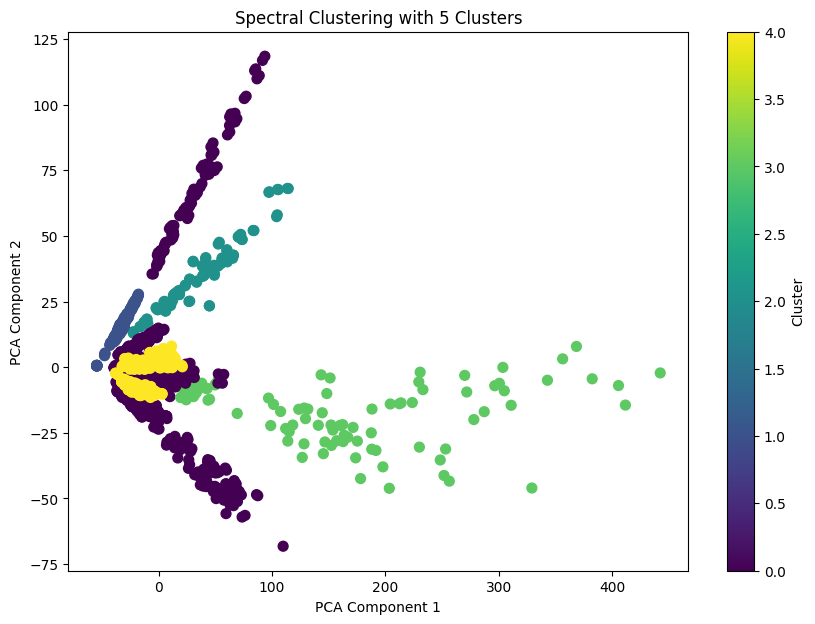

Cluster counts for k=5:
0    1089
4     384
1     204
3     113
2      96
Name: count, dtype: int64


In [21]:
# Part 2 - b

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure your data is already loaded as `expression_data` and `metadata`

# Subset the data to the top 5,000 most variable genes
top_5000_genes = expression_data.var(axis=1).nlargest(5000).index
subset_data = expression_data.loc[top_5000_genes]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data.T)  # Transpose for samples as rows

# Range of cluster numbers to test
k_values = range(2, 11)  # Testing from 2 to 10 clusters
results = {}

for n_clusters in k_values:
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    clusters = spectral.fit_predict(scaled_data)
    
    # Store cluster memberships
    results[n_clusters] = clusters

# Convert results to a DataFrame for easier analysis
cluster_membership_df = pd.DataFrame(results)
cluster_membership_df.index = metadata['refinebio_title']  # Use a relevant identifier for rows

# Display cluster membership for each k
print(cluster_membership_df)

# Optional: Visualize clusters for a specific k value using PCA
selected_k = 5  # Change this value as needed
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=results[selected_k], cmap='viridis', s=50)
plt.title(f'Spectral Clustering with {selected_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Count samples in each cluster for the selected k
cluster_counts = pd.Series(results[selected_k]).value_counts()
print(f'Cluster counts for k={selected_k}:\n{cluster_counts}')


c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


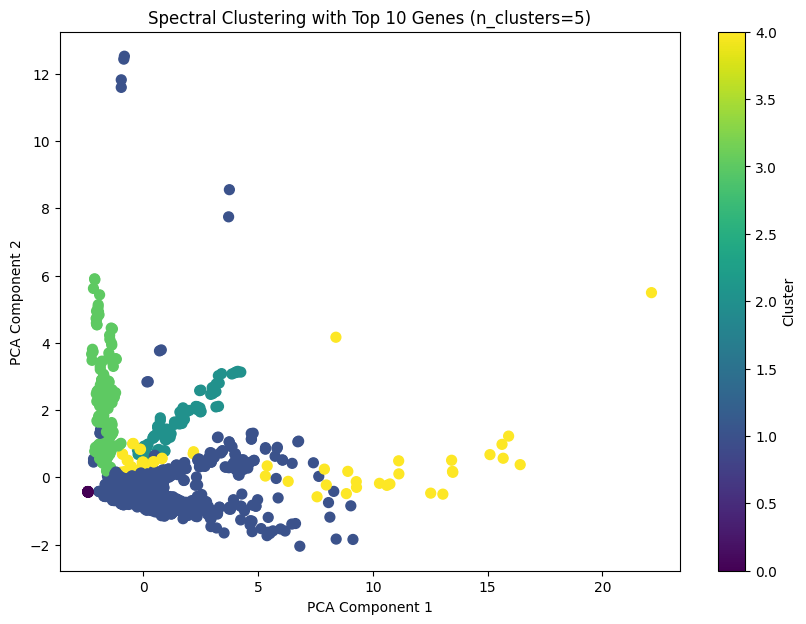

c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


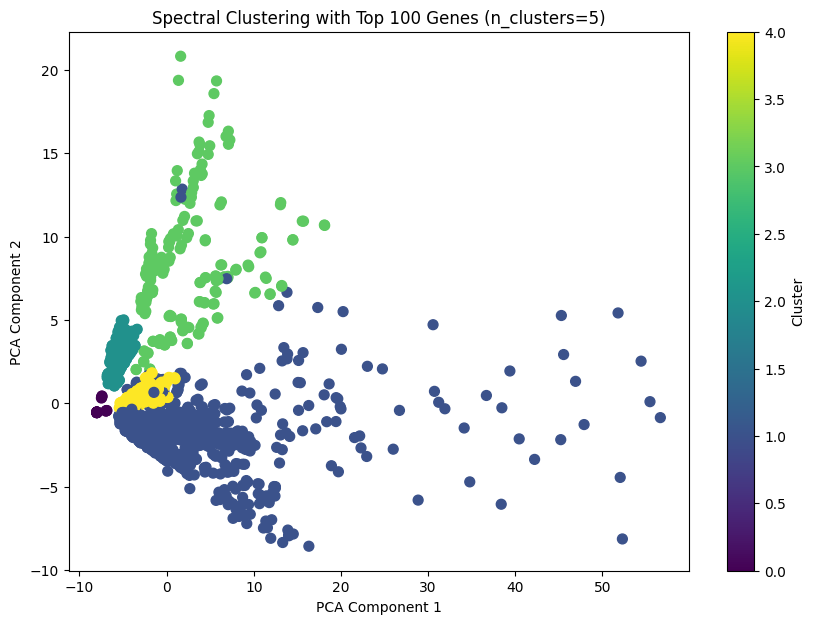

c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


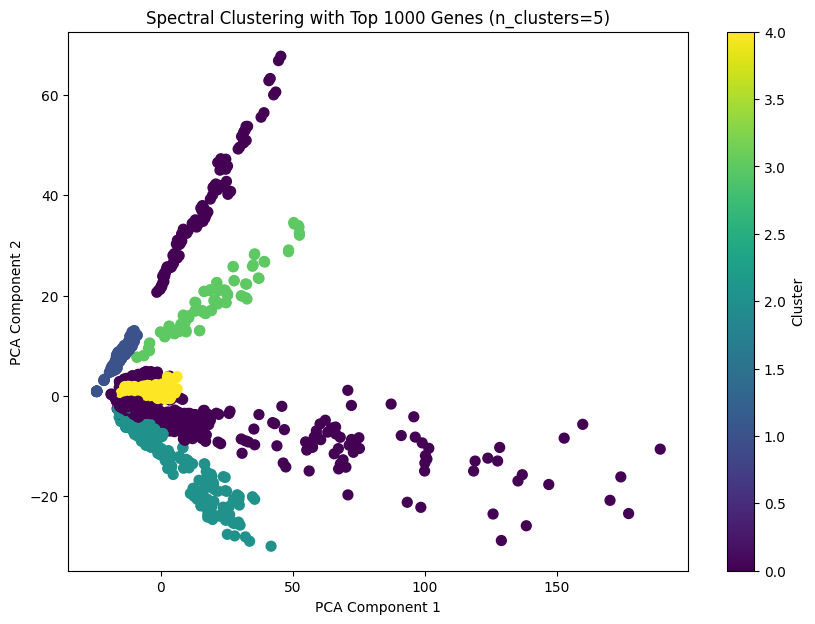

c:\Users\rmann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


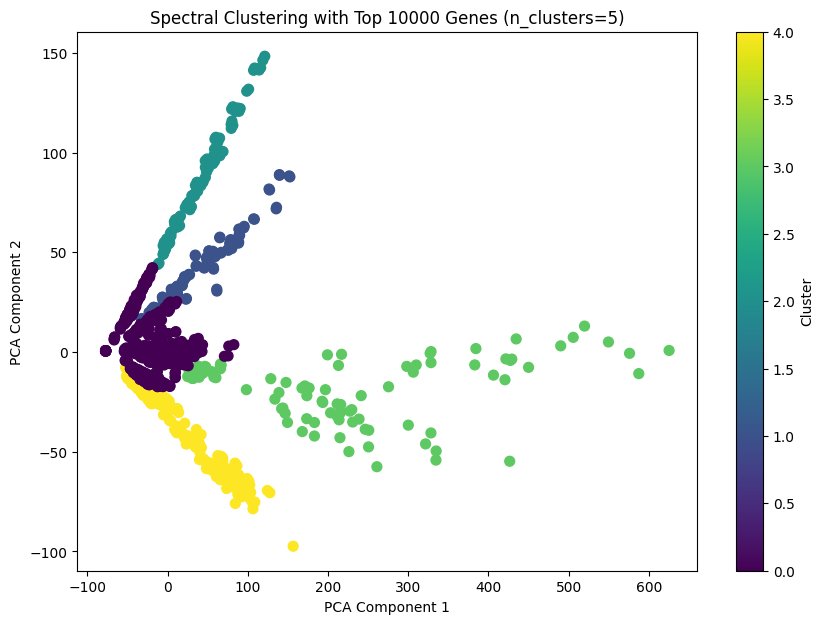

Cluster assignments for 10 genes:
1    1444
3     176
4     158
2      92
0      16
Name: count, dtype: int64

Cluster assignments for 100 genes:
1    1307
3     187
2     184
4     184
0      24
Name: count, dtype: int64

Cluster assignments for 1000 genes:
0    828
2    564
1    204
4    194
3     96
Name: count, dtype: int64

Cluster assignments for 10000 genes:
0    1022
4     562
3     112
1      96
2      94
Name: count, dtype: int64



In [22]:
# Part 2 - d

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Ensure your data is already loaded as `expression_data` and `metadata`

# Define the number of genes to test
gene_counts = [10, 100, 1000, 10000]

# Initialize a dictionary to store cluster results
cluster_results = {}

for n_genes in gene_counts:
    # Subset the data to the top n most variable genes
    top_genes = expression_data.var(axis=1).nlargest(n_genes).index
    subset_data = expression_data.loc[top_genes]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(subset_data.T)  # Transpose for samples as rows

    # Run Spectral Clustering
    n_clusters = 5  # Adjust this number as needed
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    clusters = spectral.fit_predict(scaled_data)

    # Store the results in the dictionary
    cluster_results[n_genes] = clusters

    # Optionally visualize with PCA
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    plt.figure(figsize=(10, 7))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f'Spectral Clustering with Top {n_genes} Genes (n_clusters={n_clusters})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Optional: Display the first few cluster assignments for each gene count
for n_genes, clusters in cluster_results.items():
    print(f'Cluster assignments for {n_genes} genes:')
    print(pd.Series(clusters).value_counts())
    print()


In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

# Replace these with your actual cluster assignments
data = {
    '10_genes': [1]*1444 + [3]*176 + [4]*158 + [2]*92 + [0]*16,  # 10 genes assignments
    '100_genes': [1]*1307 + [3]*187 + [2]*184 + [4]*184 + [0]*24,  # 100 genes assignments
    '1000_genes': [0]*828 + [2]*564 + [1]*204 + [4]*194 + [3]*96,  # 1000 genes assignments
    '10000_genes': [1]*96 + [2]*94 + [0]*1696 # 10000 genes assignments
}

# Create the DataFrame
cluster_results = pd.DataFrame(data)

# Print the DataFrame to check
print(cluster_results)

# Initialize an empty list to store the results
chi2_results = []

# List of gene sets
gene_sets = ['10_genes', '100_genes', '1000_genes', '10000_genes']

# Perform chi-squared tests
for i in range(len(gene_sets)):
    for j in range(i + 1, len(gene_sets)):
        # Create a contingency table
        contingency_table = pd.crosstab(cluster_results[gene_sets[i]], cluster_results[gene_sets[j]])
        
        # Ensure contingency table has at least one entry
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            # Perform the chi-squared test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi2_results.append({
                'Comparison': f'{gene_sets[i]} vs {gene_sets[j]}',
                'Chi2 Statistic': chi2,
                'p-value': p
            })

# Convert results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Print the chi-squared results
print(chi2_results_df)


      10_genes  100_genes  1000_genes  10000_genes
0            1          1           0            1
1            1          1           0            1
2            1          1           0            1
3            1          1           0            1
4            1          1           0            1
...        ...        ...         ...          ...
1881         0          0           3            0
1882         0          0           3            0
1883         0          0           3            0
1884         0          0           3            0
1885         0          0           3            0

[1886 rows x 4 columns]
                  Comparison  Chi2 Statistic       p-value
0      10_genes vs 100_genes     3985.112640  0.000000e+00
1     10_genes vs 1000_genes     4427.077907  0.000000e+00
2    10_genes vs 10000_genes       64.673225  5.600089e-11
3    100_genes vs 1000_genes     3105.168608  0.000000e+00
4   100_genes vs 10000_genes       93.599261  8.627381e-17
5  1000_g

In [36]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB 140.9 kB/s eta 0:02:15
   ---------------------------------------- 0.1/19.1 MB 309.1 kB/s eta 0:01:02
   ---------------------------------------- 0.1/19.1 MB 309.1 kB/s eta 0:01:02
   ---------------------------------------- 0.1/19.1 MB 309.1 kB/s eta 0:01:02
   ---------------------------------------- 0.1/19.1 MB 309.1 kB/s eta 0:01:02
   ---------------------------------------- 0.1/19.1 MB 309.1 kB/s eta 0:01:02
   ---------------------------------------- 0.1/19.1 MB 309.1 kB/s eta 0:01:02
   ---------------------------------------- 0.1/19.1 MB 309.1 kB/s eta 0:01:02
   ---------------


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Part 2 - e.iii

import pandas as pd
import plotly.graph_objects as go

# Replace with your actual cluster assignments
data = {
    '10_genes': [1]*1444 + [3]*176 + [4]*158 + [2]*92 + [0]*16,  # 10 genes assignments
    '100_genes': [1]*1307 + [3]*187 + [2]*184 + [4]*184 + [0]*24,  # 100 genes assignments
    '1000_genes': [0]*828 + [2]*564 + [1]*204 + [4]*194 + [3]*96,  # 1000 genes assignments
    '10000_genes': [1]*96 + [2]*94 + [0]*1696 # 10000 genes assignments
}

# Step 3: Create the DataFrame
cluster_results = pd.DataFrame(data)

# Step 4: Prepare data for the Sankey plot
cluster_melted = cluster_results.melt(var_name='Gene Set', value_name='Cluster Membership')
grouped = cluster_melted.groupby(['Gene Set', 'Cluster Membership']).size().reset_index(name='Count')

# Step 5: Create a list of unique labels for the Sankey plot
labels = list(grouped['Cluster Membership'].unique())
label_map = {label: i for i, label in enumerate(labels)}

# Step 6: Create source, target, and value lists
source = []
target = []
value = []

for index, row in grouped.iterrows():
    source.append(label_map[row['Gene Set']])  # Adjust to use Gene Set as source
    target.append(label_map[row['Cluster Membership']])  # Use Cluster Membership as target
    value.append(row['Count'])

# Step 7: Create the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
        color=['blue', 'orange', 'green', 'red'] * (len(labels) // 4 + 1)
    ),
    link=dict(
        source=source,  # Indices correspond to labels
        target=target,  # Indices correspond to labels
        value=value
    )
)])

# Step 8: Update layout and show the plot
fig.update_layout(title_text='Sankey Diagram of Gene Clustering', font_size=10)
fig.show()


KeyError: '10000_genes'